<a href="https://colab.research.google.com/github/gabrieldilay/NaoSupervisionadoPaises/blob/main/Trab_NaoSup_Gabriel_Dilay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [388]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline

In [389]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [390]:
df = pd.read_csv('/content/drive/MyDrive/Data Science/Country-data.csv',
                      sep=',', encoding='iso-8859-1')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [391]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [392]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [393]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

Detectando Outiliers

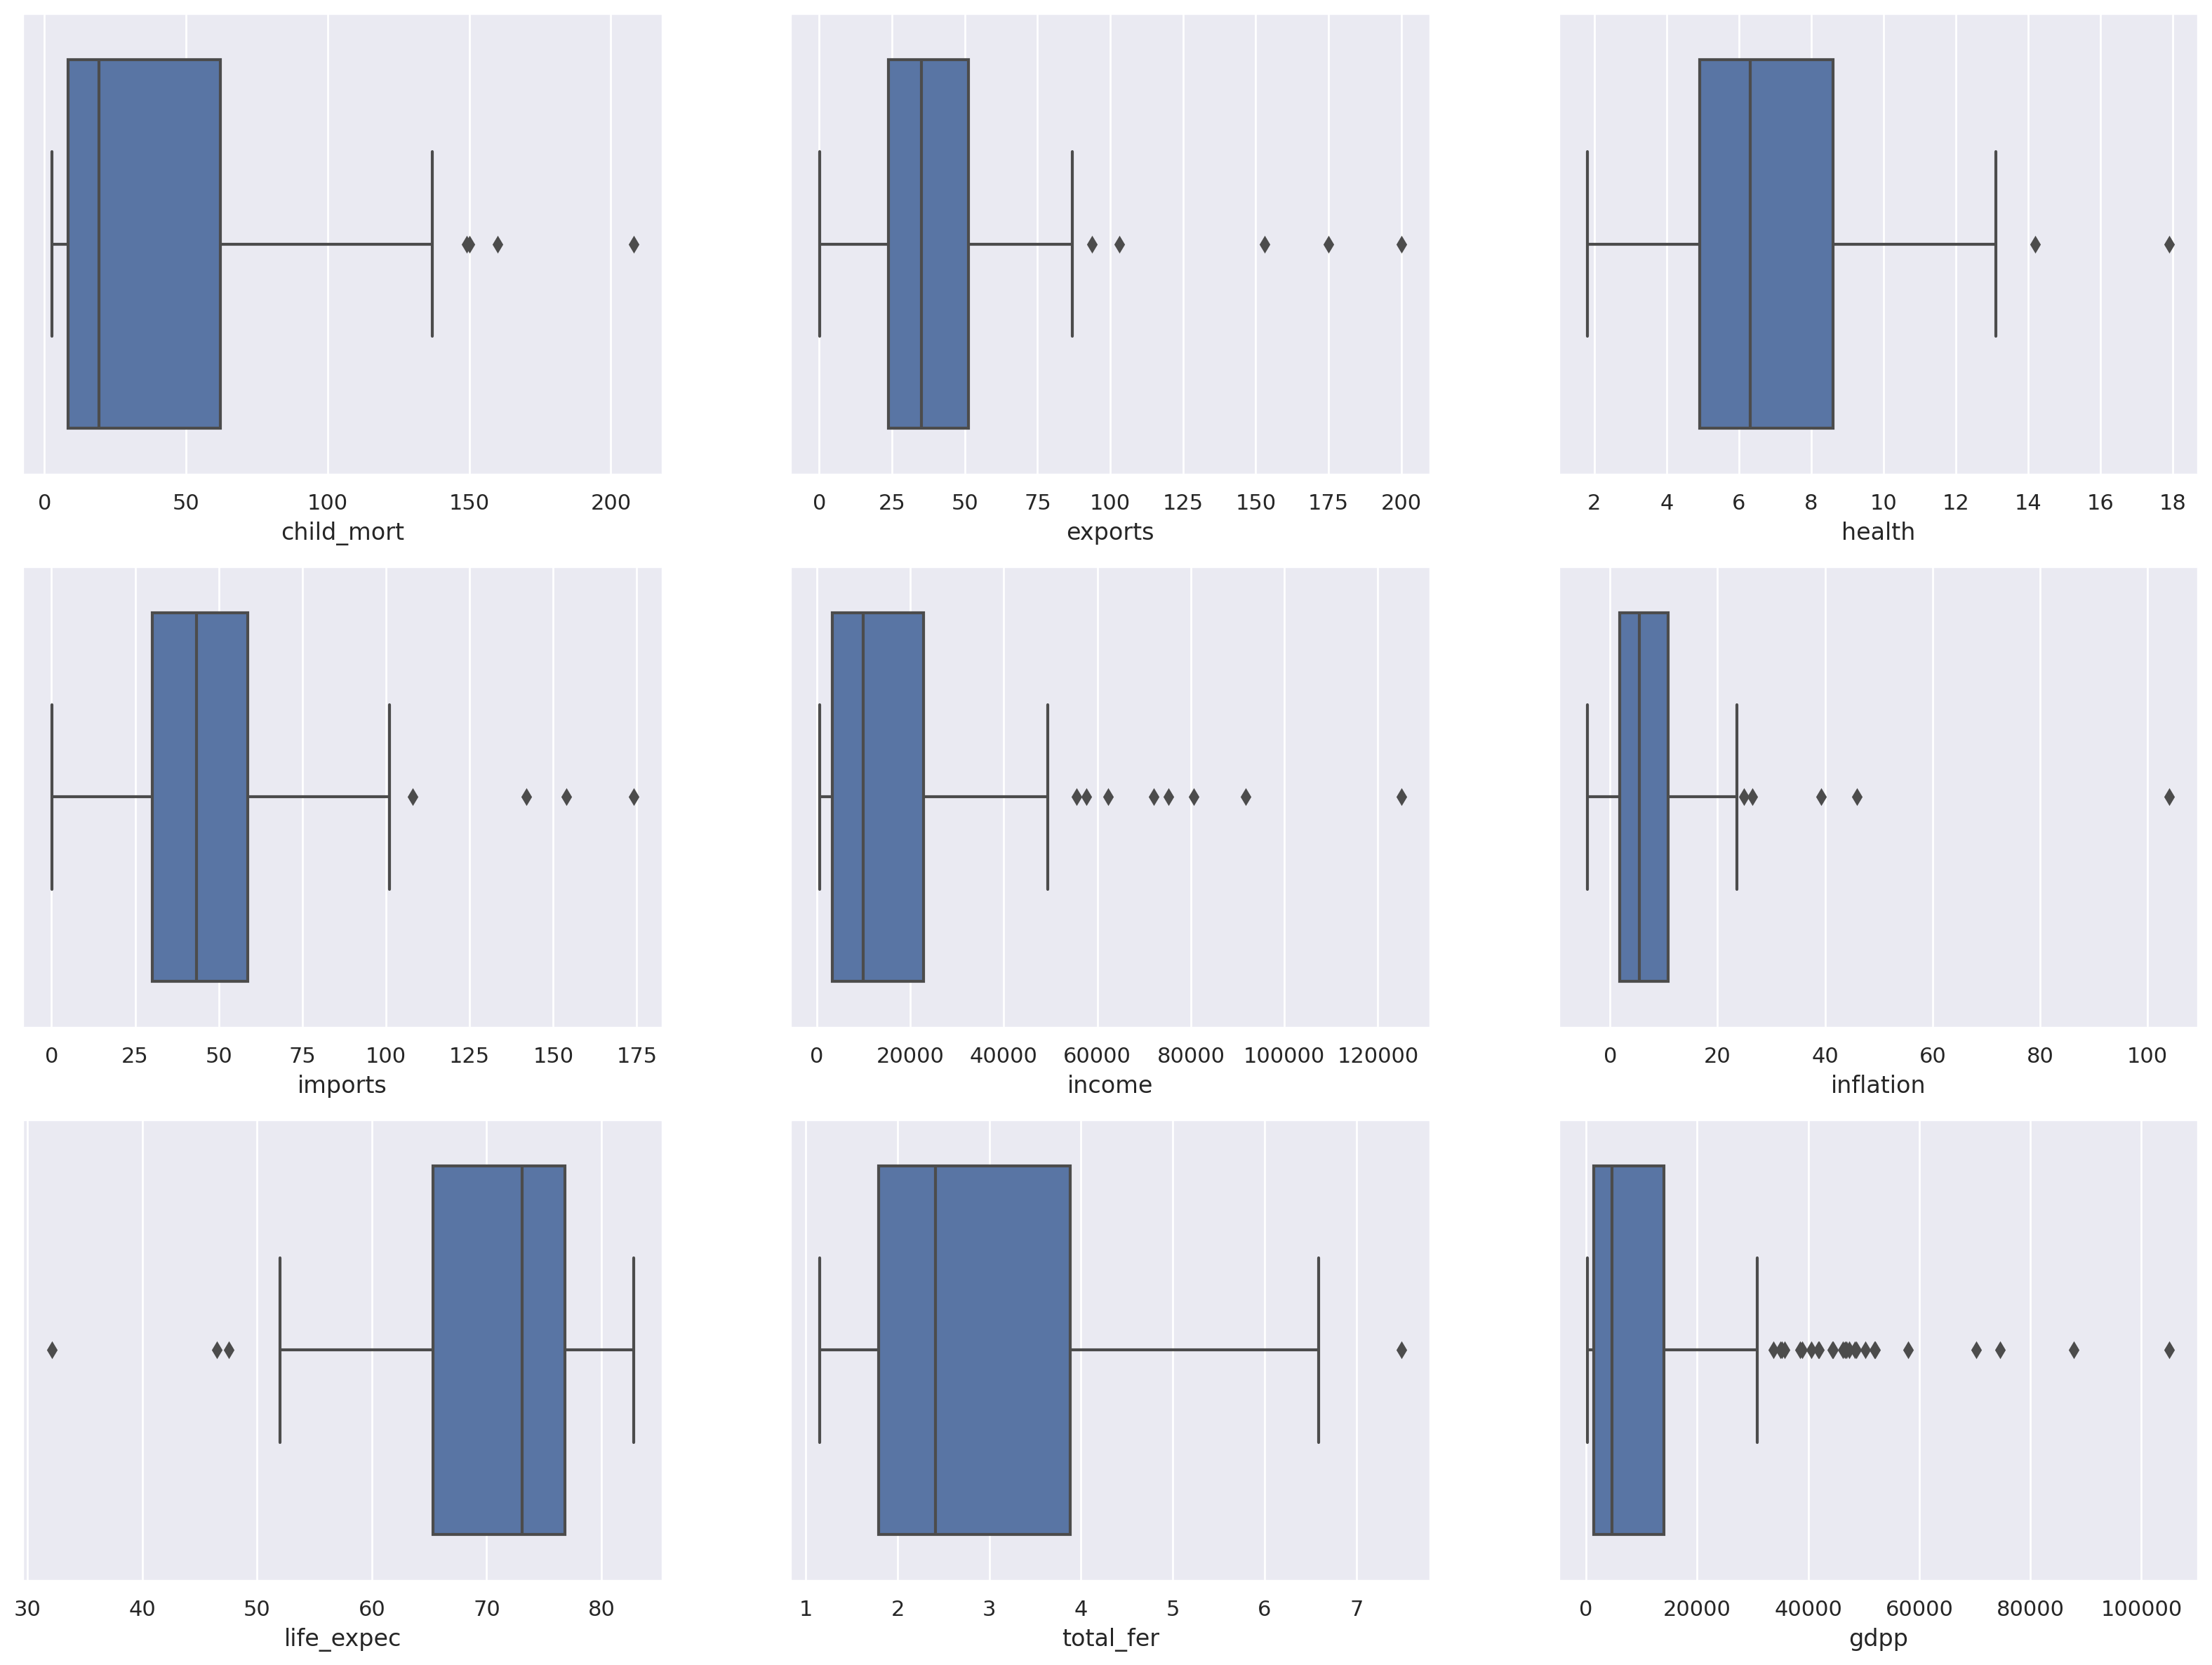

In [394]:
plt.figure(figsize=(20,20), dpi=200)

plt.subplot(4,3,1)
sns.boxplot(x = 'child_mort', data = df)

plt.subplot(4,3,2)
sns.boxplot(x = 'exports', data = df)

plt.subplot(4,3,3)
sns.boxplot(x = 'health', data = df)

plt.subplot(4,3,4)
sns.boxplot(x = 'imports', data = df)

plt.subplot(4,3,5)
sns.boxplot(x = 'income', data = df)

plt.subplot(4,3,6)
sns.boxplot(x = 'inflation', data = df)

plt.subplot(4,3,7)
sns.boxplot(x = 'life_expec', data = df)

plt.subplot(4,3,8)
sns.boxplot(x = 'total_fer', data = df)

plt.subplot(4,3,9)
sns.boxplot(x = 'gdpp', data = df)

In [395]:
from scipy import stats

z = np.abs(stats.zscore(df[['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']]))

In [396]:
df_outliers_removed = df[(z<3).all(axis=1)]
df_outliers_removed.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [397]:
X = df_outliers_removed.drop('country',axis =1)  
y = df_outliers_removed['country']

In [398]:
x.shape

(150,)

In [399]:
y.shape

(153,)

## PCA

In [400]:
X.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [401]:
y.head()

0            Afghanistan
1                Albania
2                Algeria
3                 Angola
4    Antigua and Barbuda
Name: country, dtype: object

In [402]:
from sklearn.preprocessing import StandardScaler

In [403]:
scaler = StandardScaler()

In [404]:
X_scaled = scaler.fit_transform(X)

In [405]:
X_scaled[:5,:5]

array([[ 1.46183636, -1.41330427,  0.31809414, -0.04379952, -0.95456912],
       [-0.56911214, -0.52600184, -0.08875965,  0.15011384, -0.331921  ],
       [-0.27385196, -0.01333821, -1.02886841, -0.75132124, -0.10965359],
       [ 2.25655534,  1.16480224, -1.55027327, -0.14861755, -0.63351618],
       [-0.74295692,  0.3366533 , -0.29416156,  0.68992671,  0.354339  ]])

In [406]:
X.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [407]:
X_scaled_df = pd.DataFrame(X_scaled,columns=X.columns)

In [408]:
X_scaled_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.461836,-1.413304,0.318094,-0.043800,-0.954569,0.348785,-1.738235,1.944385,-0.722055
1,-0.569112,-0.526002,-0.088760,0.150114,-0.331921,-0.365865,0.712299,-0.886986,-0.467590
2,-0.273852,-0.013338,-1.028868,-0.751321,-0.109654,1.310315,0.736682,-0.045044,-0.440971
3,2.256555,1.164802,-1.550273,-0.148618,-0.633516,2.219869,-1.262759,2.175240,-0.507878
4,-0.742957,0.336653,-0.294162,0.689927,0.354339,-0.806205,0.773257,-0.561073,0.115874


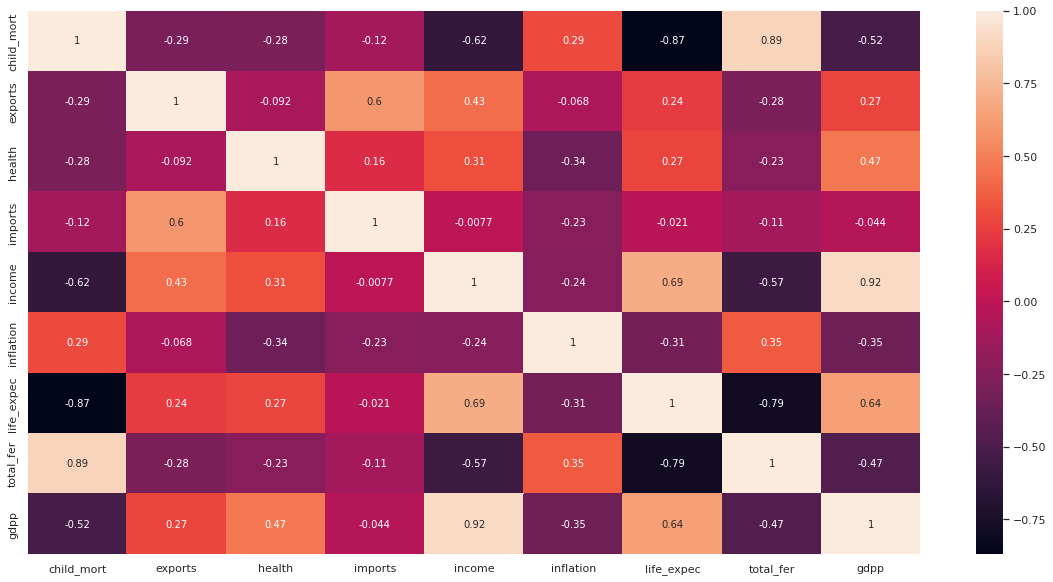

In [409]:
plt.figure(figsize = (20,10))       
sns.heatmap(X_scaled_df.corr(),annot = True)

In [410]:
from sklearn.decomposition import PCA

In [411]:
pca = PCA(random_state=42)

In [412]:
pca.fit(X_scaled)

PCA(random_state=42)

In [413]:
pca.components_[0]

array([-0.42321972,  0.2036042 ,  0.21754201,  0.08290998,  0.41369318,
       -0.22650995,  0.42715413, -0.40550525,  0.39482635])

In [414]:
pca.explained_variance_ratio_

array([0.47638387, 0.16902847, 0.13080614, 0.10179586, 0.06939066,
       0.02084938, 0.01747184, 0.00883956, 0.00543422])

In [415]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)
var_cumu

array([0.47638387, 0.64541234, 0.77621848, 0.87801434, 0.94740499,
       0.96825437, 0.98572622, 0.99456578, 1.        ])

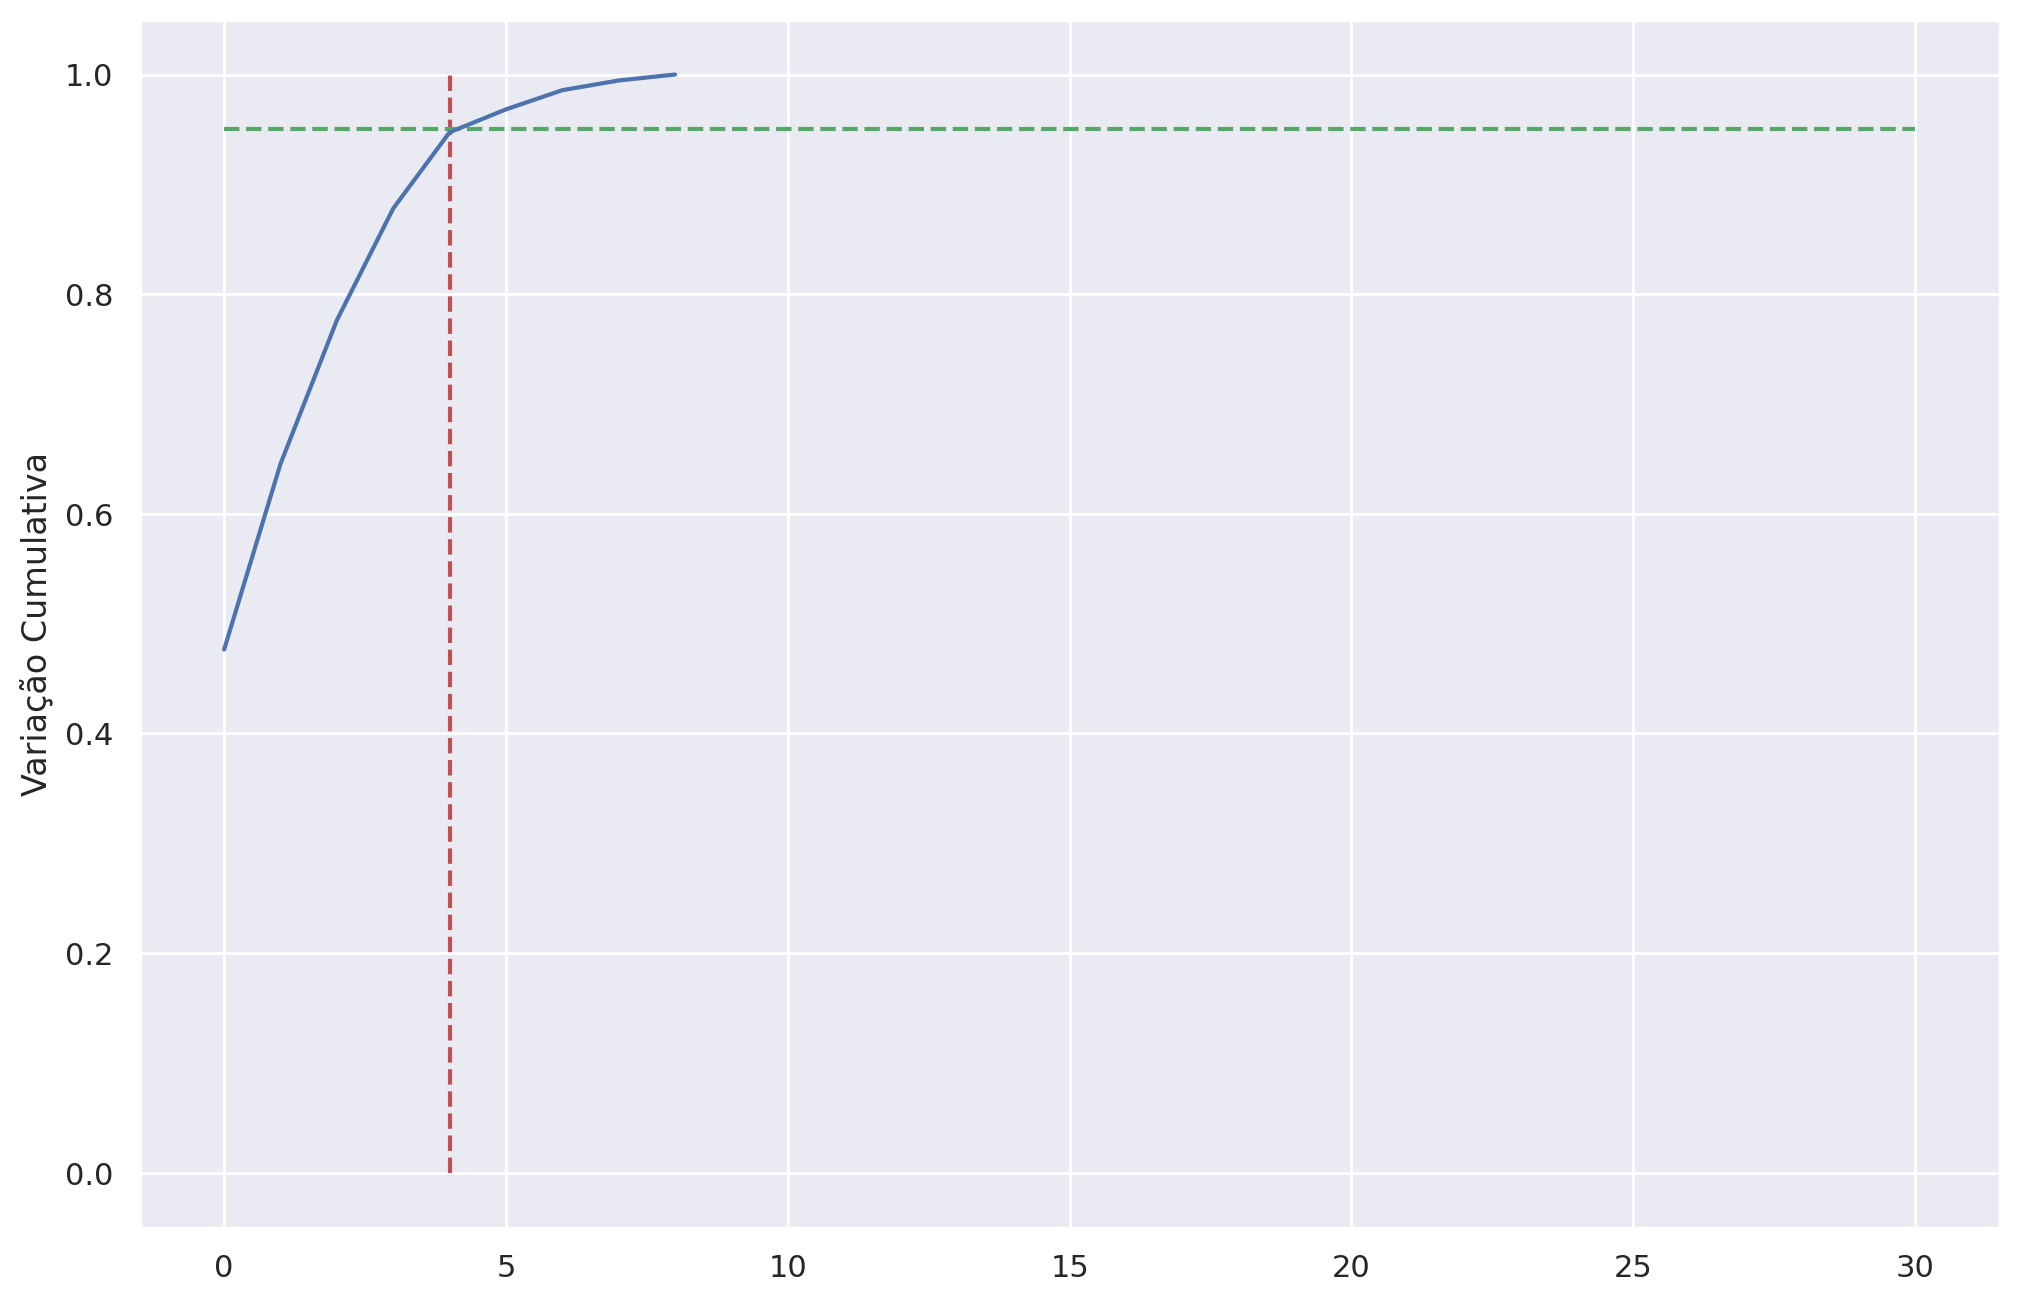

In [416]:
fig = plt.figure(figsize=[12,8],dpi=200)
plt.vlines(x=4, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Variação Cumulativa")
plt.show()

In [417]:
from sklearn.decomposition import IncrementalPCA

In [418]:
pca_final = IncrementalPCA(n_components=4)

In [419]:
X_pca_final = pca_final.fit_transform(X_scaled)

In [420]:
corrmat = np.corrcoef(X_pca_final.transpose())

In [421]:
corrmat.shape

(4, 4)

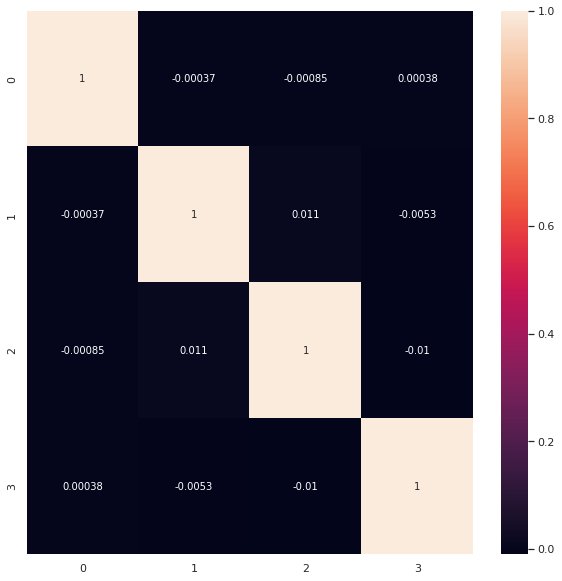

In [422]:
plt.figure(figsize=[10,10])
sns.heatmap(corrmat, annot=True)

## K MEANS

In [423]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [424]:
kmeans = KMeans(n_clusters=5, max_iter=1000)
kmeans.fit(X_pca_final)

KMeans(max_iter=1000, n_clusters=5)

In [425]:
kmeans.labels_

array([1, 2, 3, 1, 2, 3, 3, 0, 0, 3, 0, 4, 3, 2, 2, 4, 2, 1, 2, 3, 2, 2,
       3, 2, 1, 1, 2, 1, 0, 2, 1, 1, 3, 3, 3, 1, 1, 1, 2, 1, 2, 4, 4, 0,
       3, 3, 3, 2, 1, 3, 4, 2, 0, 0, 3, 1, 2, 0, 1, 0, 2, 3, 1, 1, 2, 4,
       0, 3, 3, 3, 3, 4, 0, 0, 2, 0, 2, 3, 1, 1, 2, 1, 2, 2, 1, 1, 4, 4,
       2, 1, 1, 4, 4, 1, 1, 2, 2, 2, 3, 2, 2, 1, 3, 2, 3, 0, 0, 4, 3, 4,
       2, 3, 3, 2, 0, 2, 3, 1, 2, 3, 1, 2, 4, 4, 4, 2, 1, 4, 0, 3, 2, 1,
       2, 0, 3, 1, 2, 1, 1, 2, 2, 3, 2, 1, 2, 4, 0, 3, 3, 2, 2, 3, 1],
      dtype=int32)

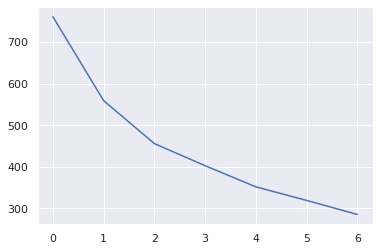

In [426]:
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=1000)
    kmeans.fit(X_pca_final)
    ssd.append(kmeans.inertia_)

plt.plot(ssd)

In [427]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    kmeans = KMeans(n_clusters=num_clusters, max_iter=1000)
    kmeans.fit(X_pca_final)
    
    cluster_labels = kmeans.labels_
    
   
    silhouette_avg = silhouette_score(X_pca_final, cluster_labels)
    print("Para n_clusters={0}, a pontuação é {1}".format(num_clusters, silhouette_avg))

Para n_clusters=2, a pontuação é 0.3185783255391955
Para n_clusters=3, a pontuação é 0.3214159977534033
Para n_clusters=4, a pontuação é 0.30692081115076797
Para n_clusters=5, a pontuação é 0.2924411047683417
Para n_clusters=6, a pontuação é 0.28239559625100835
Para n_clusters=7, a pontuação é 0.2826532873629692
Para n_clusters=8, a pontuação é 0.2814130324158366


In [428]:
kmeans = KMeans(n_clusters=4, max_iter=1000, random_state=42)
kmeans.fit(X_pca_final)

KMeans(max_iter=1000, n_clusters=4, random_state=42)

In [429]:
kmeans.labels_

array([1, 3, 0, 1, 3, 0, 0, 2, 2, 0, 2, 2, 0, 3, 3, 2, 3, 1, 3, 0, 3, 1,
       0, 3, 1, 1, 3, 1, 2, 3, 1, 1, 0, 0, 0, 1, 1, 1, 3, 1, 3, 2, 3, 2,
       0, 0, 0, 3, 1, 1, 3, 3, 2, 2, 0, 1, 3, 2, 1, 2, 3, 0, 1, 1, 3, 3,
       2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 3, 0, 1, 1, 3, 1, 3, 3, 1, 1, 0, 3,
       3, 1, 1, 3, 3, 1, 1, 3, 3, 3, 0, 3, 3, 1, 0, 1, 0, 2, 2, 0, 1, 3,
       3, 0, 0, 3, 2, 3, 0, 1, 3, 0, 1, 3, 3, 3, 2, 3, 1, 2, 2, 0, 3, 1,
       3, 2, 1, 1, 3, 1, 1, 3, 3, 0, 3, 1, 3, 2, 2, 0, 0, 3, 3, 1, 1],
      dtype=int32)

In [430]:
df_outliers_removed['K-Means_Cluster_ID'] = kmeans.labels_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [431]:
df_outliers_removed

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K-Means_Cluster_ID
0,Afghanistan,90.2,10.000,7.58,44.9000,1610,9.440,56.2,5.82,553,1
1,Albania,16.6,28.000,6.55,48.6000,9930,4.490,76.3,1.65,4090,3
2,Algeria,27.3,38.400,4.17,31.4000,12900,16.100,76.5,2.89,4460,0
3,Angola,119.0,62.300,2.85,42.9000,5900,22.400,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.500,6.03,58.9000,19100,1.440,76.8,2.13,12200,3
5,Argentina,14.5,18.900,8.10,16.0000,18700,20.900,75.8,2.37,10300,0
6,Armenia,18.1,20.800,4.40,45.3000,6700,7.770,73.3,1.69,3220,0
7,Australia,4.8,19.800,8.73,20.9000,41400,1.160,82.0,1.93,51900,2
8,Austria,4.3,51.300,11.00,47.8000,43200,0.873,80.5,1.44,46900,2
9,Azerbaijan,39.2,54.300,5.88,20.7000,16000,13.800,69.1,1.92,5840,0


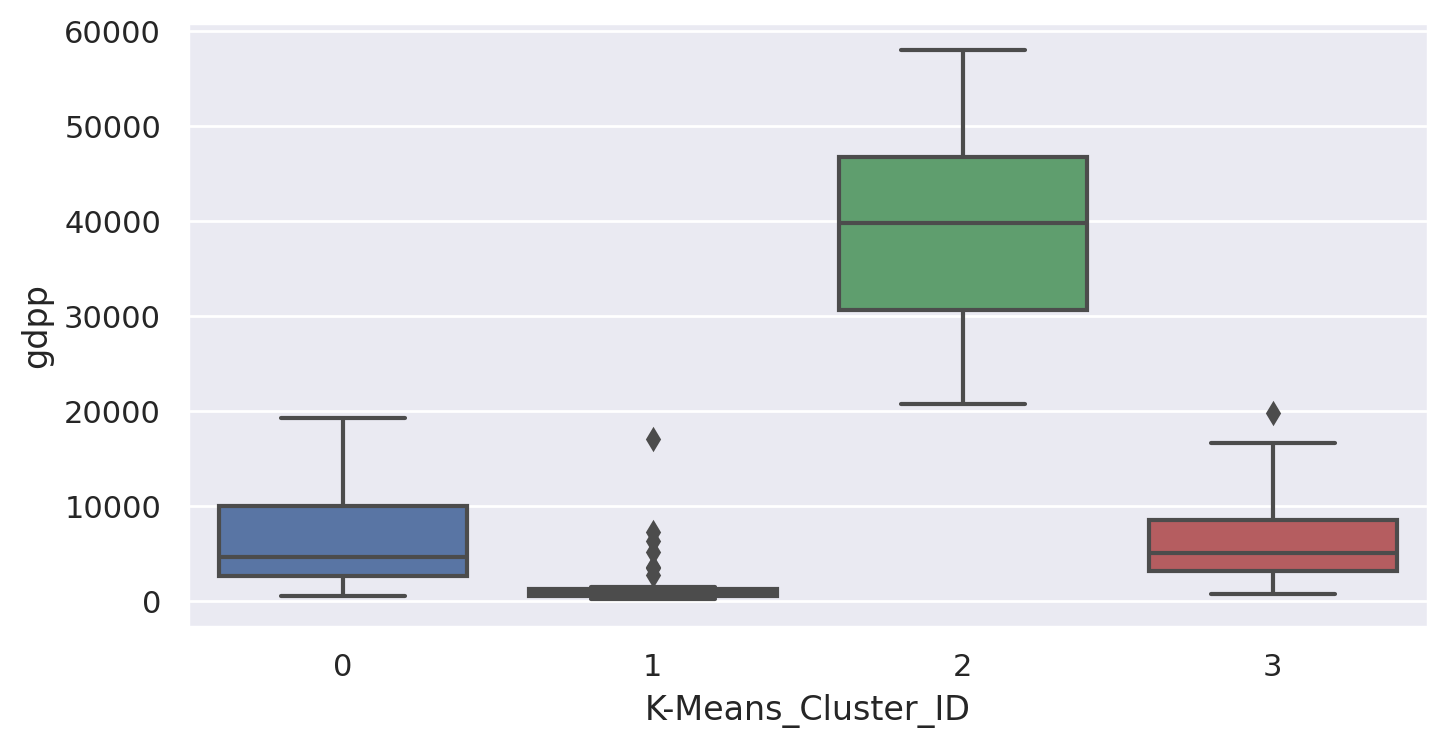

In [432]:
plt.figure(figsize=(8,4),dpi=200)
sns.boxplot(x='K-Means_Cluster_ID', y='gdpp', data=df_outliers_removed)

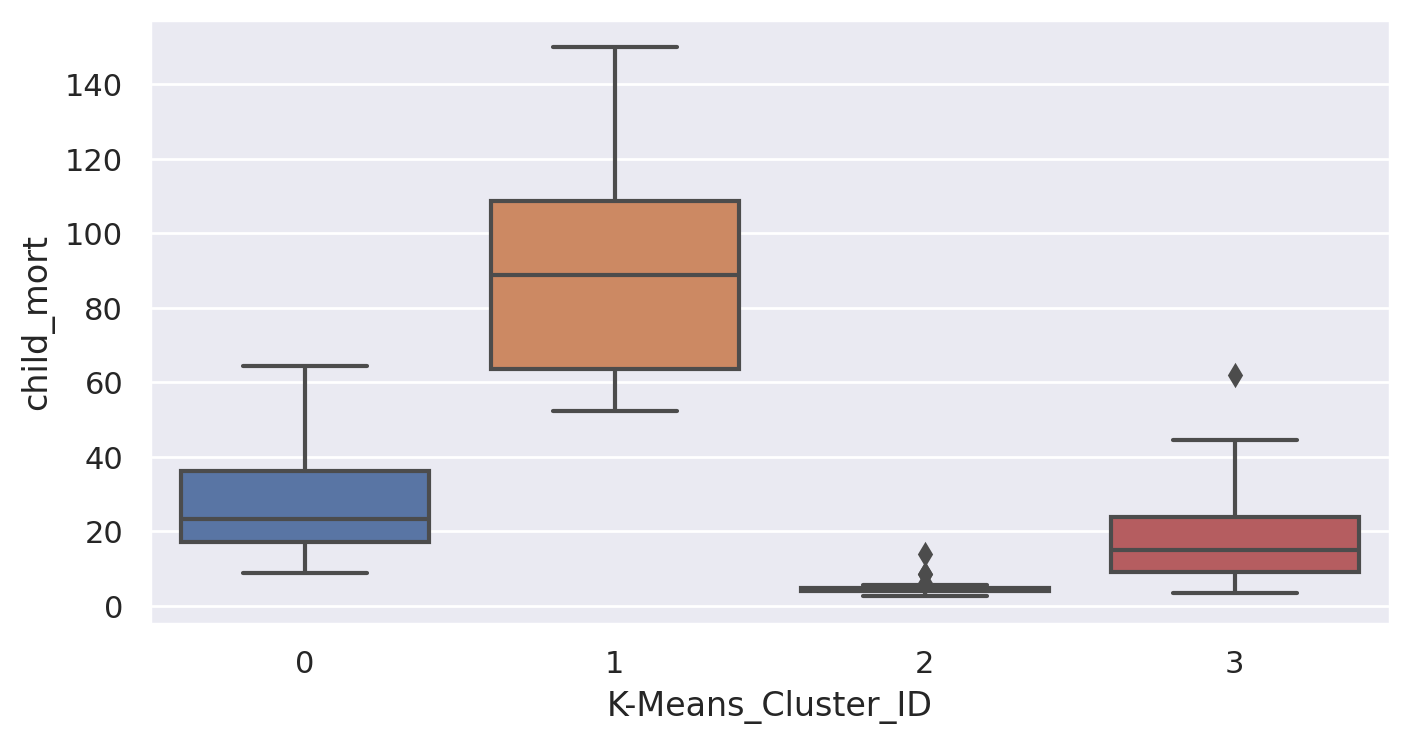

In [433]:
plt.figure(figsize=(8,4),dpi=200)
sns.boxplot(x='K-Means_Cluster_ID', y='child_mort', data=df_outliers_removed)

## Agrupamento Hierárquico

In [434]:
X_scaled_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.461836,-1.413304,0.318094,-0.043800,-0.954569,0.348785,-1.738235,1.944385,-0.722055
1,-0.569112,-0.526002,-0.088760,0.150114,-0.331921,-0.365865,0.712299,-0.886986,-0.467590
2,-0.273852,-0.013338,-1.028868,-0.751321,-0.109654,1.310315,0.736682,-0.045044,-0.440971
3,2.256555,1.164802,-1.550273,-0.148618,-0.633516,2.219869,-1.262759,2.175240,-0.507878
4,-0.742957,0.336653,-0.294162,0.689927,0.354339,-0.806205,0.773257,-0.561073,0.115874


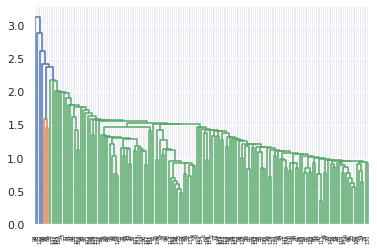

In [435]:
sl_mergings = linkage(X_scaled_df, method="single", metric='euclidean')
dendrogram(sl_mergings)
plt.show()

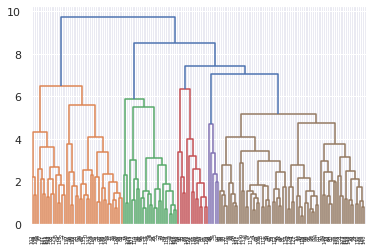

In [436]:
cl_mergings = linkage(X_scaled_df, method="complete", metric='euclidean')
dendrogram(cl_mergings)
plt.show()

In [437]:
sl_cluster_labels = cut_tree(sl_mergings, n_clusters=4).reshape(-1, )
sl_cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [438]:
cl_cluster_labels = cut_tree(cl_mergings, n_clusters=4).reshape(-1, )
cl_cluster_labels

array([0, 1, 0, 1, 1, 0, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 0, 3, 1, 2, 2, 0, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1, 3,
       2, 1, 0, 0, 0, 2, 2, 2, 1, 2, 1, 0, 0, 3, 1, 1, 1, 1, 3, 3, 2, 3,
       1, 0, 0, 3, 3, 0, 1, 1, 3, 1, 1, 1, 1, 0, 0, 1, 0, 2, 2, 2, 0, 3,
       1, 1, 1, 1, 2, 1, 0, 0, 1, 2, 0, 1, 3, 3, 1, 1, 1, 1, 2, 0, 1, 0,
       1, 2, 1, 0, 3, 0, 0, 1, 1, 1, 3, 0, 1, 2, 2, 1, 0, 1, 1, 0, 0])

In [439]:
df_outliers_removed["Hierarchical_Cluster_labels"] = cl_cluster_labels

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [440]:
df_outliers_removed.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K-Means_Cluster_ID,Hierarchical_Cluster_labels
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,3,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,3,1


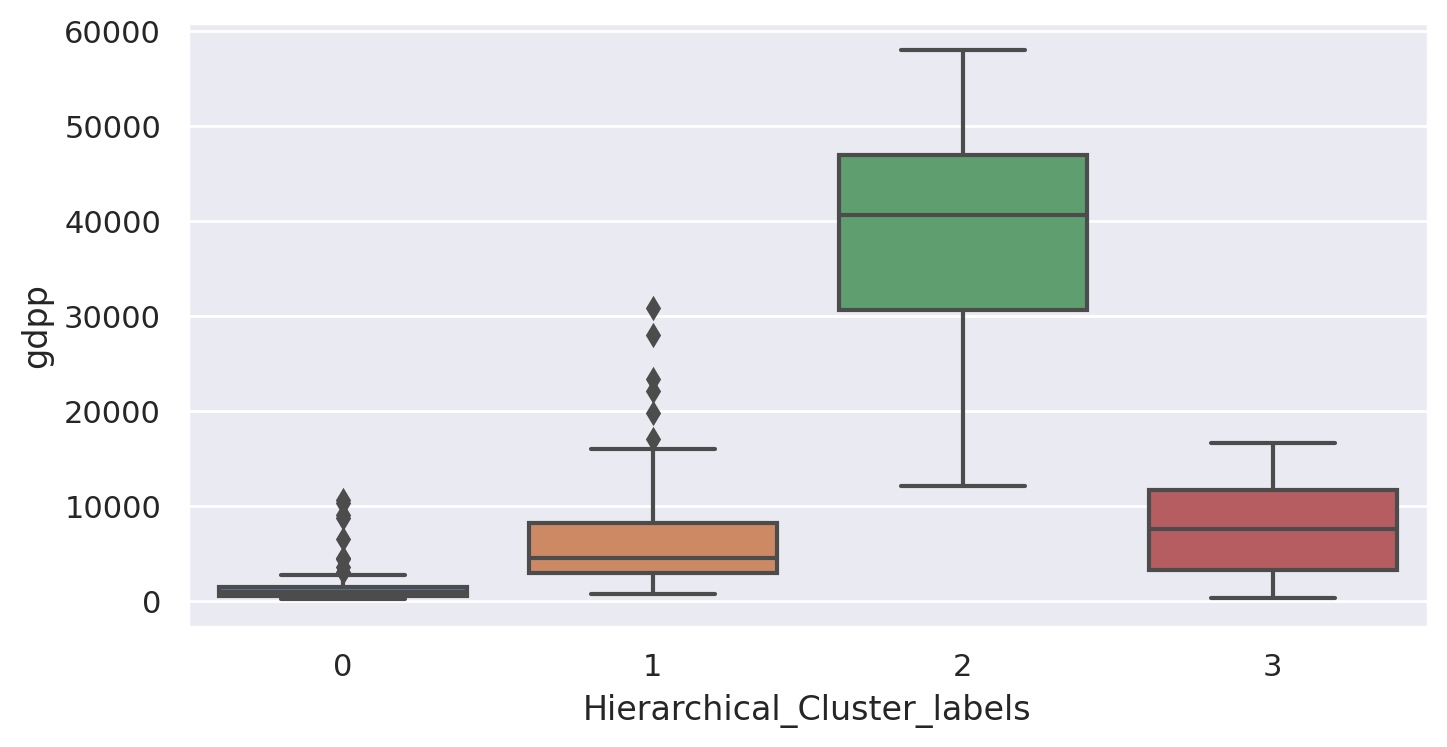

In [441]:
plt.figure(figsize=(8,4),dpi=200)
sns.boxplot(x='Hierarchical_Cluster_labels', y='gdpp', data=df_outliers_removed)

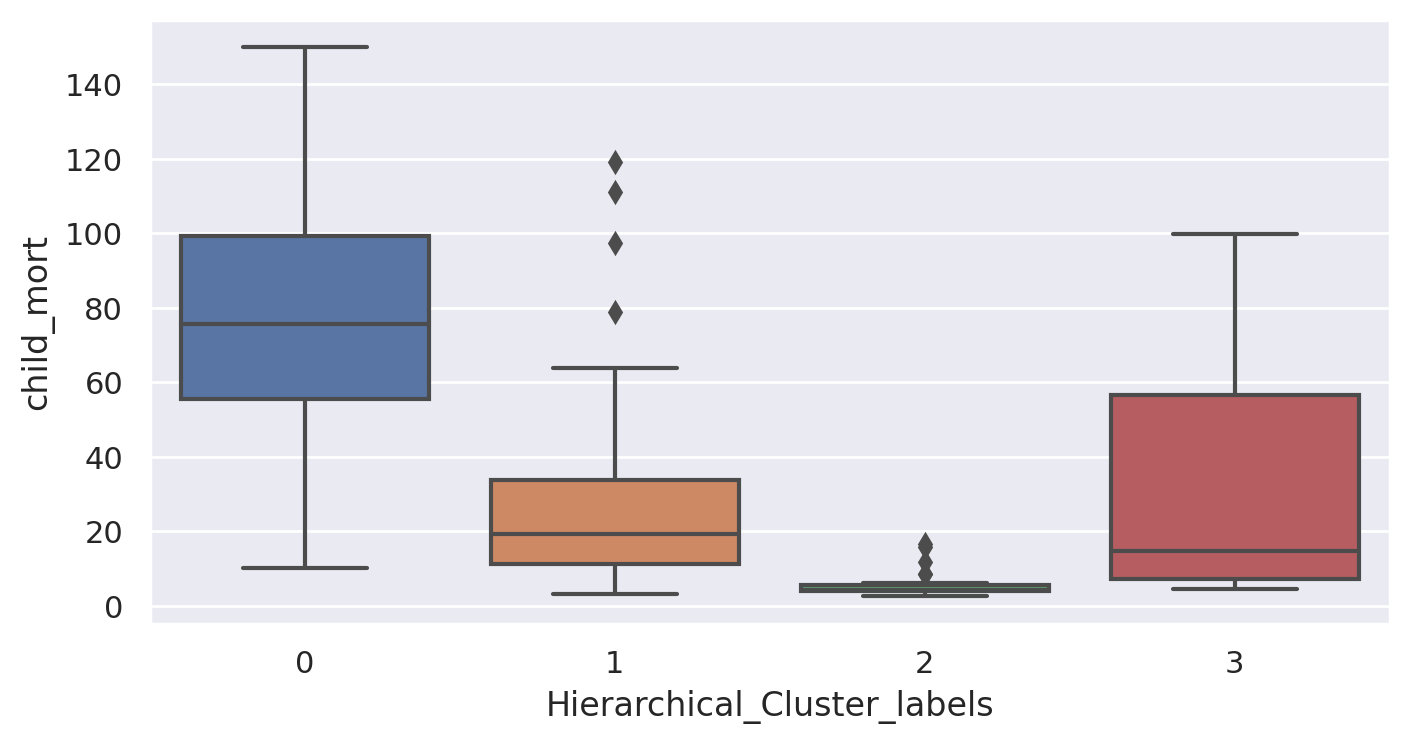

In [442]:
plt.figure(figsize=(8,4),dpi=200)
sns.boxplot(x='Hierarchical_Cluster_labels', y='child_mort', data=df_outliers_removed)

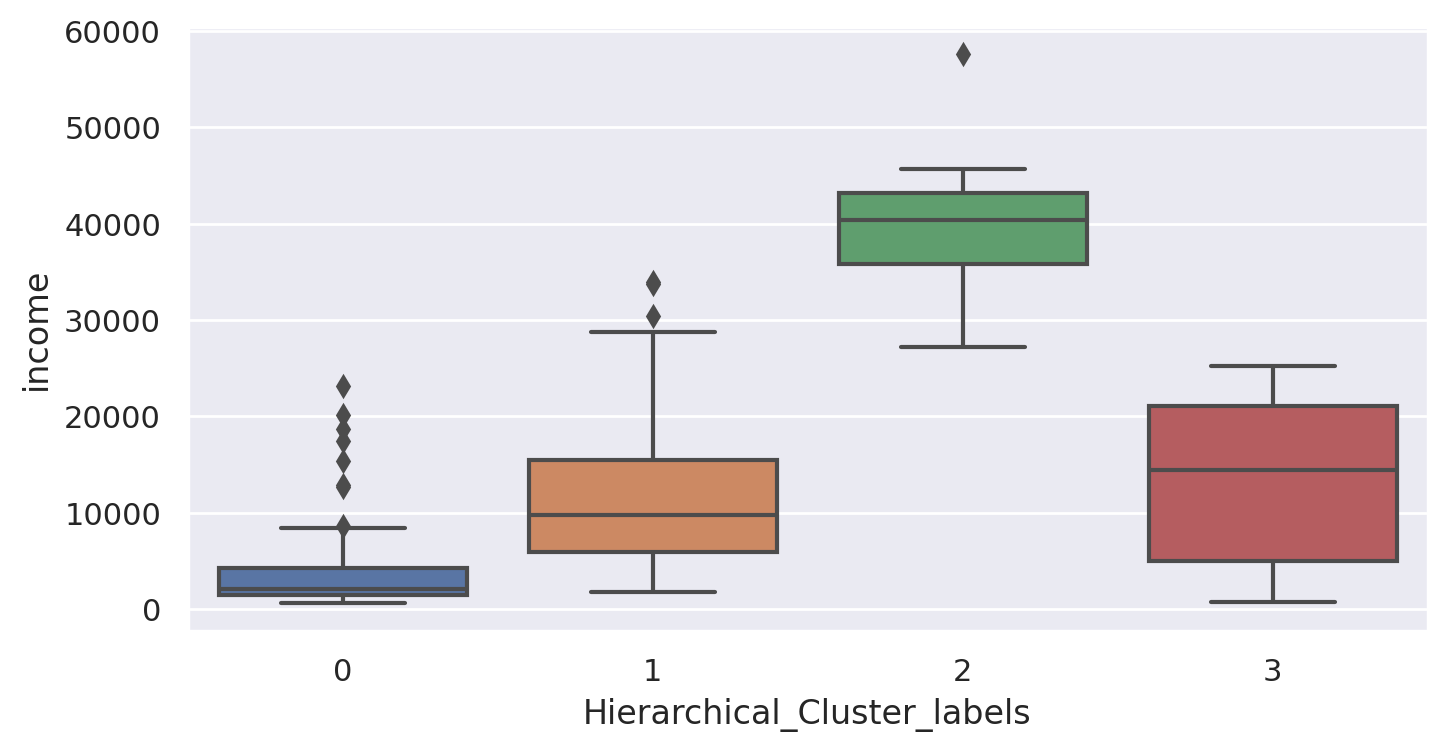

In [443]:
plt.figure(figsize=(8,4),dpi=200)
sns.boxplot(x='Hierarchical_Cluster_labels', y='income', data=df_outliers_removed)

In [444]:
df_outliers_removed.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K-Means_Cluster_ID,Hierarchical_Cluster_labels
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,3,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,3,1


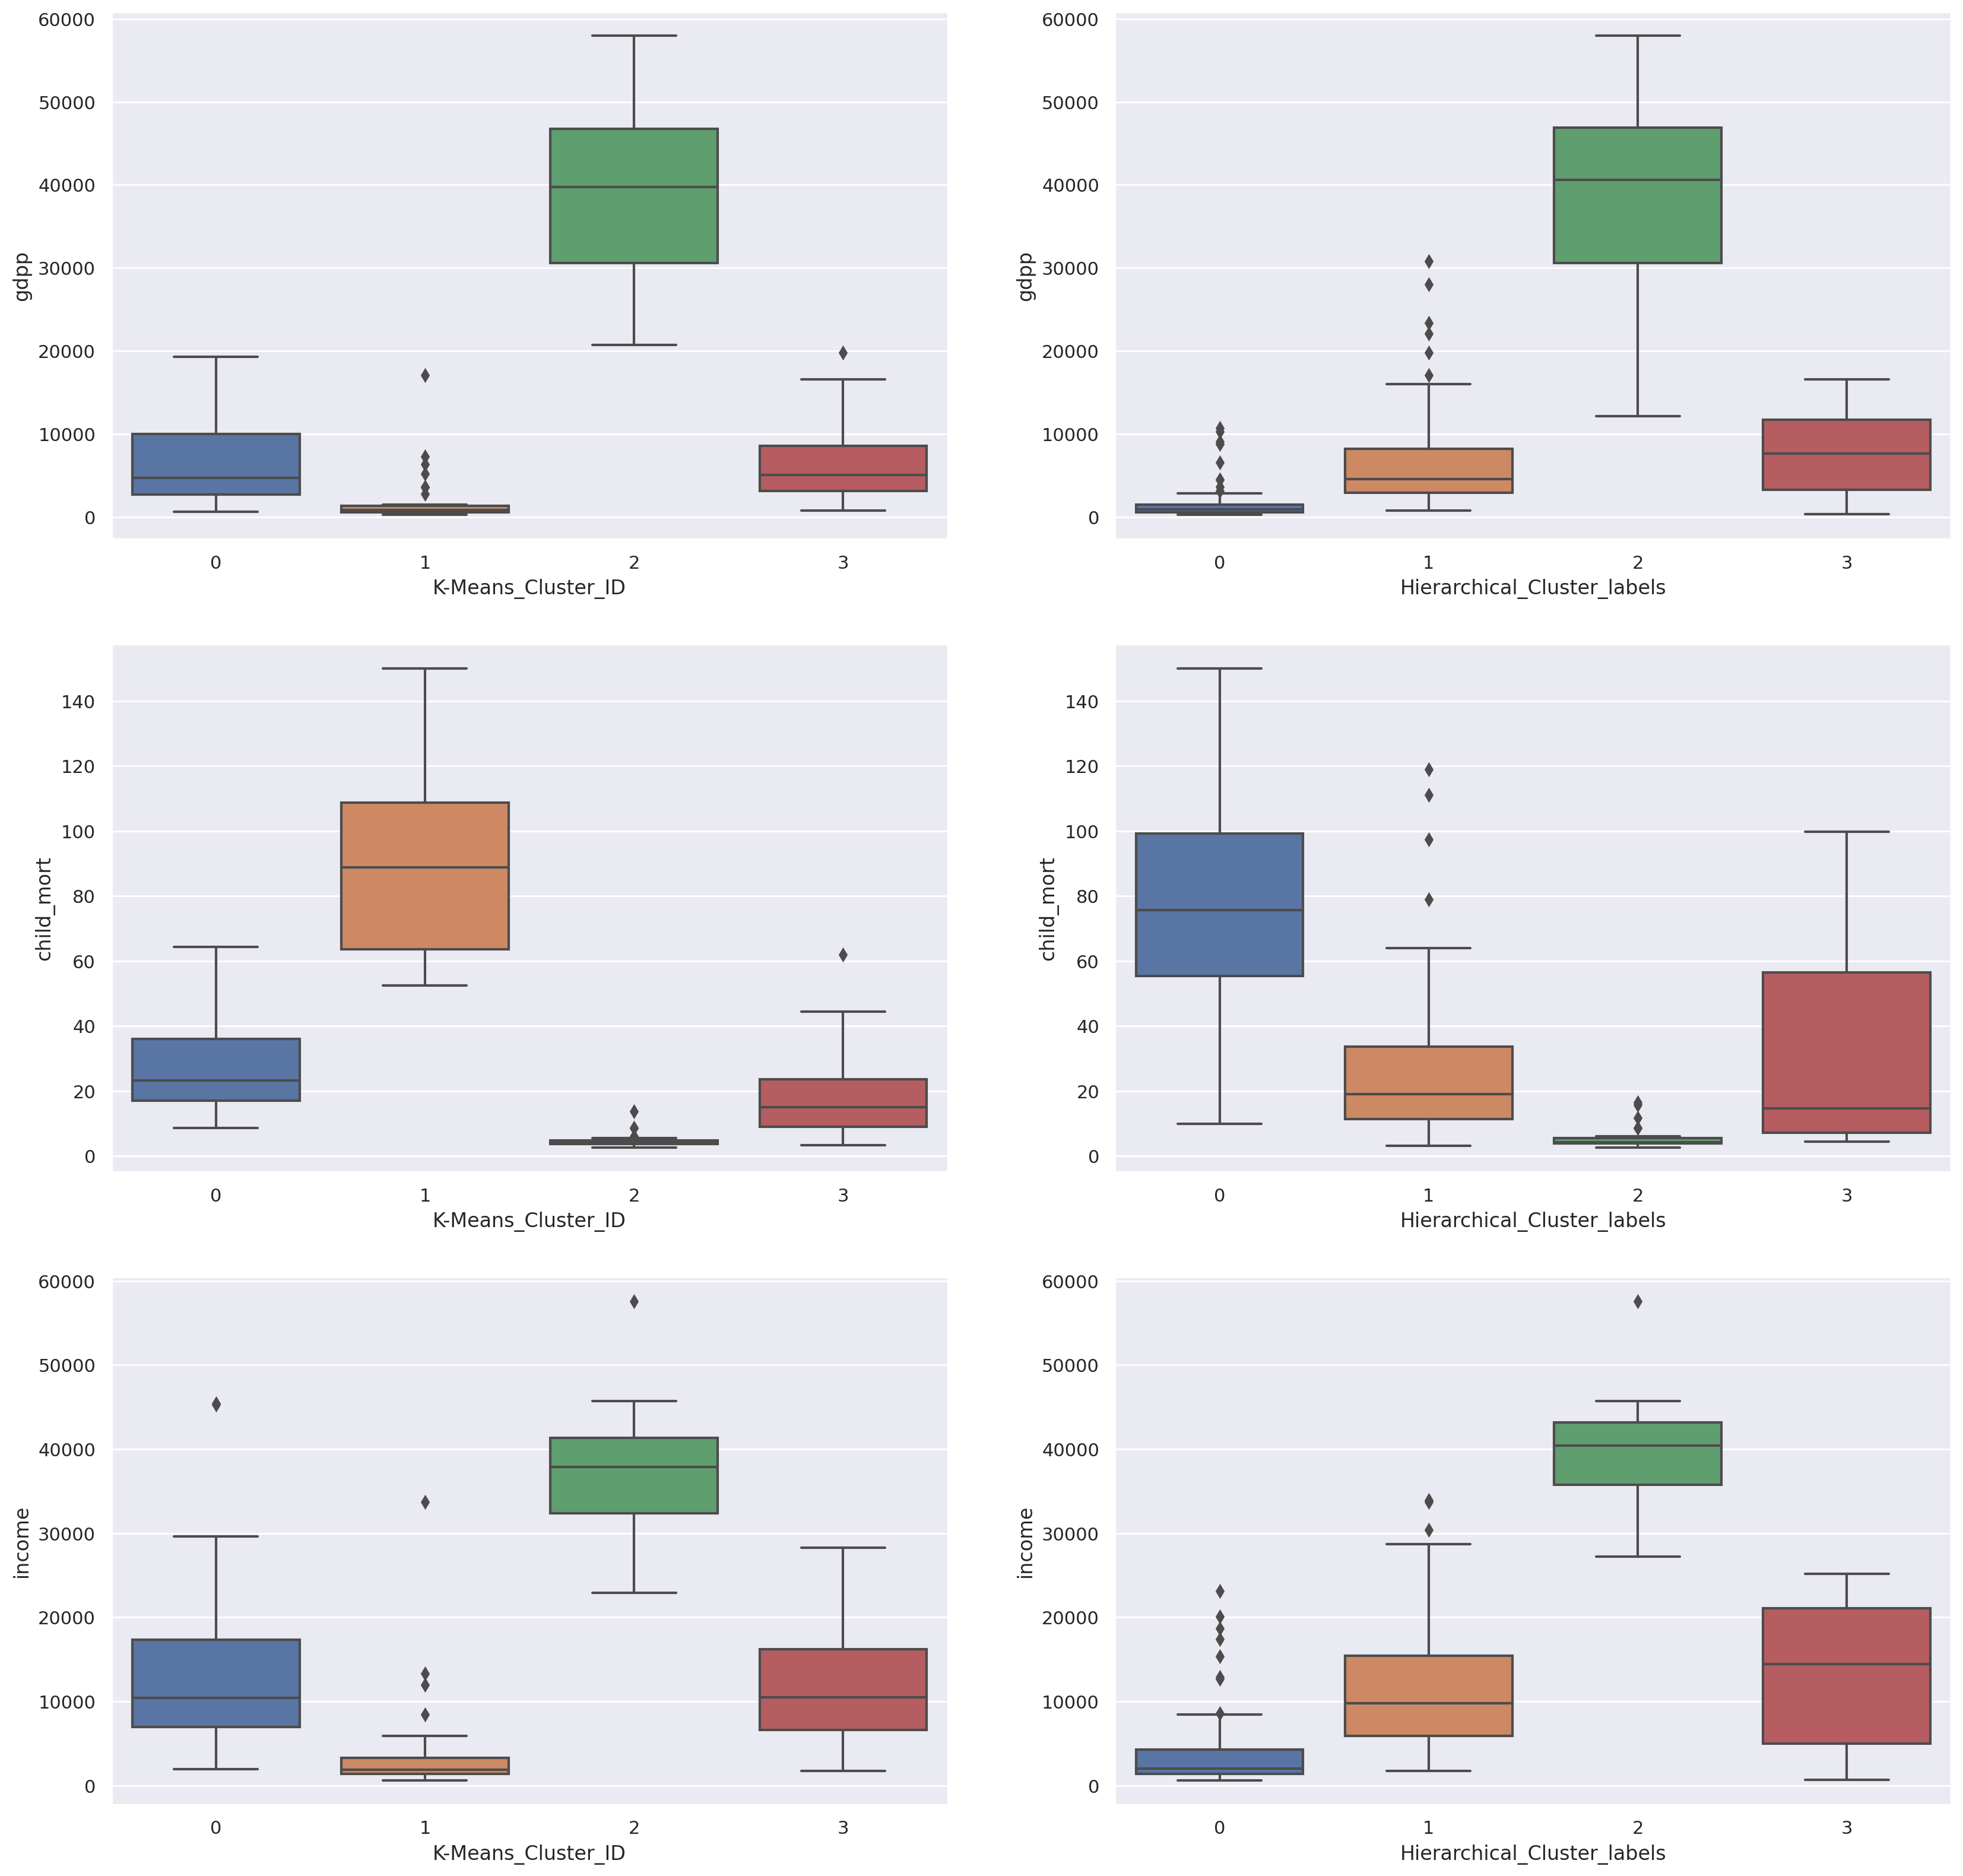

In [445]:
plt.figure(figsize=(20,20), dpi=200)

plt.subplot(3,2,1)
sns.boxplot(x='K-Means_Cluster_ID', y='gdpp', data=df_outliers_removed)

plt.subplot(3,2,2)
sns.boxplot(x='Hierarchical_Cluster_labels', y='gdpp', data=df_outliers_removed)

plt.subplot(3,2,3)
sns.boxplot(x='K-Means_Cluster_ID', y='child_mort', data=df_outliers_removed)

plt.subplot(3,2,4)
sns.boxplot(x='Hierarchical_Cluster_labels', y='child_mort', data=df_outliers_removed)

plt.subplot(3,2,5)
sns.boxplot(x='K-Means_Cluster_ID', y='income', data=df_outliers_removed)

plt.subplot(3,2,6)
sns.boxplot(x='Hierarchical_Cluster_labels', y='income', data=df_outliers_removed)

In [446]:
X_pca_final_df = pd.DataFrame(X_pca_final,columns=['PC1','PC2','PC3','PC4'])

In [447]:
X_pca_final_df.head()

,PC1,PC2,PC3,PC4
0,-3.129112,-0.530438,1.326366,0.592673
1,0.552498,-0.242770,-0.157737,-1.362826
2,-0.357008,-0.461483,-1.876976,-0.109599
3,-3.456355,1.213750,-1.381585,2.217845
4,1.308078,0.615244,-0.031004,-0.713291


In [448]:
X_pca_final_df['K_Means_Cluster_ID'] = kmeans.labels_
X_pca_final_df['Hierarchical_Cluster_Labels'] = cl_cluster_labels

In [449]:
X_pca_final_df.head()

,PC1,PC2,PC3,PC4,K_Means_Cluster_ID,Hierarchical_Cluster_Labels
0,-3.129112,-0.530438,1.326366,0.592673,1,0
1,0.552498,-0.242770,-0.157737,-1.362826,3,1
2,-0.357008,-0.461483,-1.876976,-0.109599,0,0
3,-3.456355,1.213750,-1.381585,2.217845,1,1
4,1.308078,0.615244,-0.031004,-0.713291,3,1


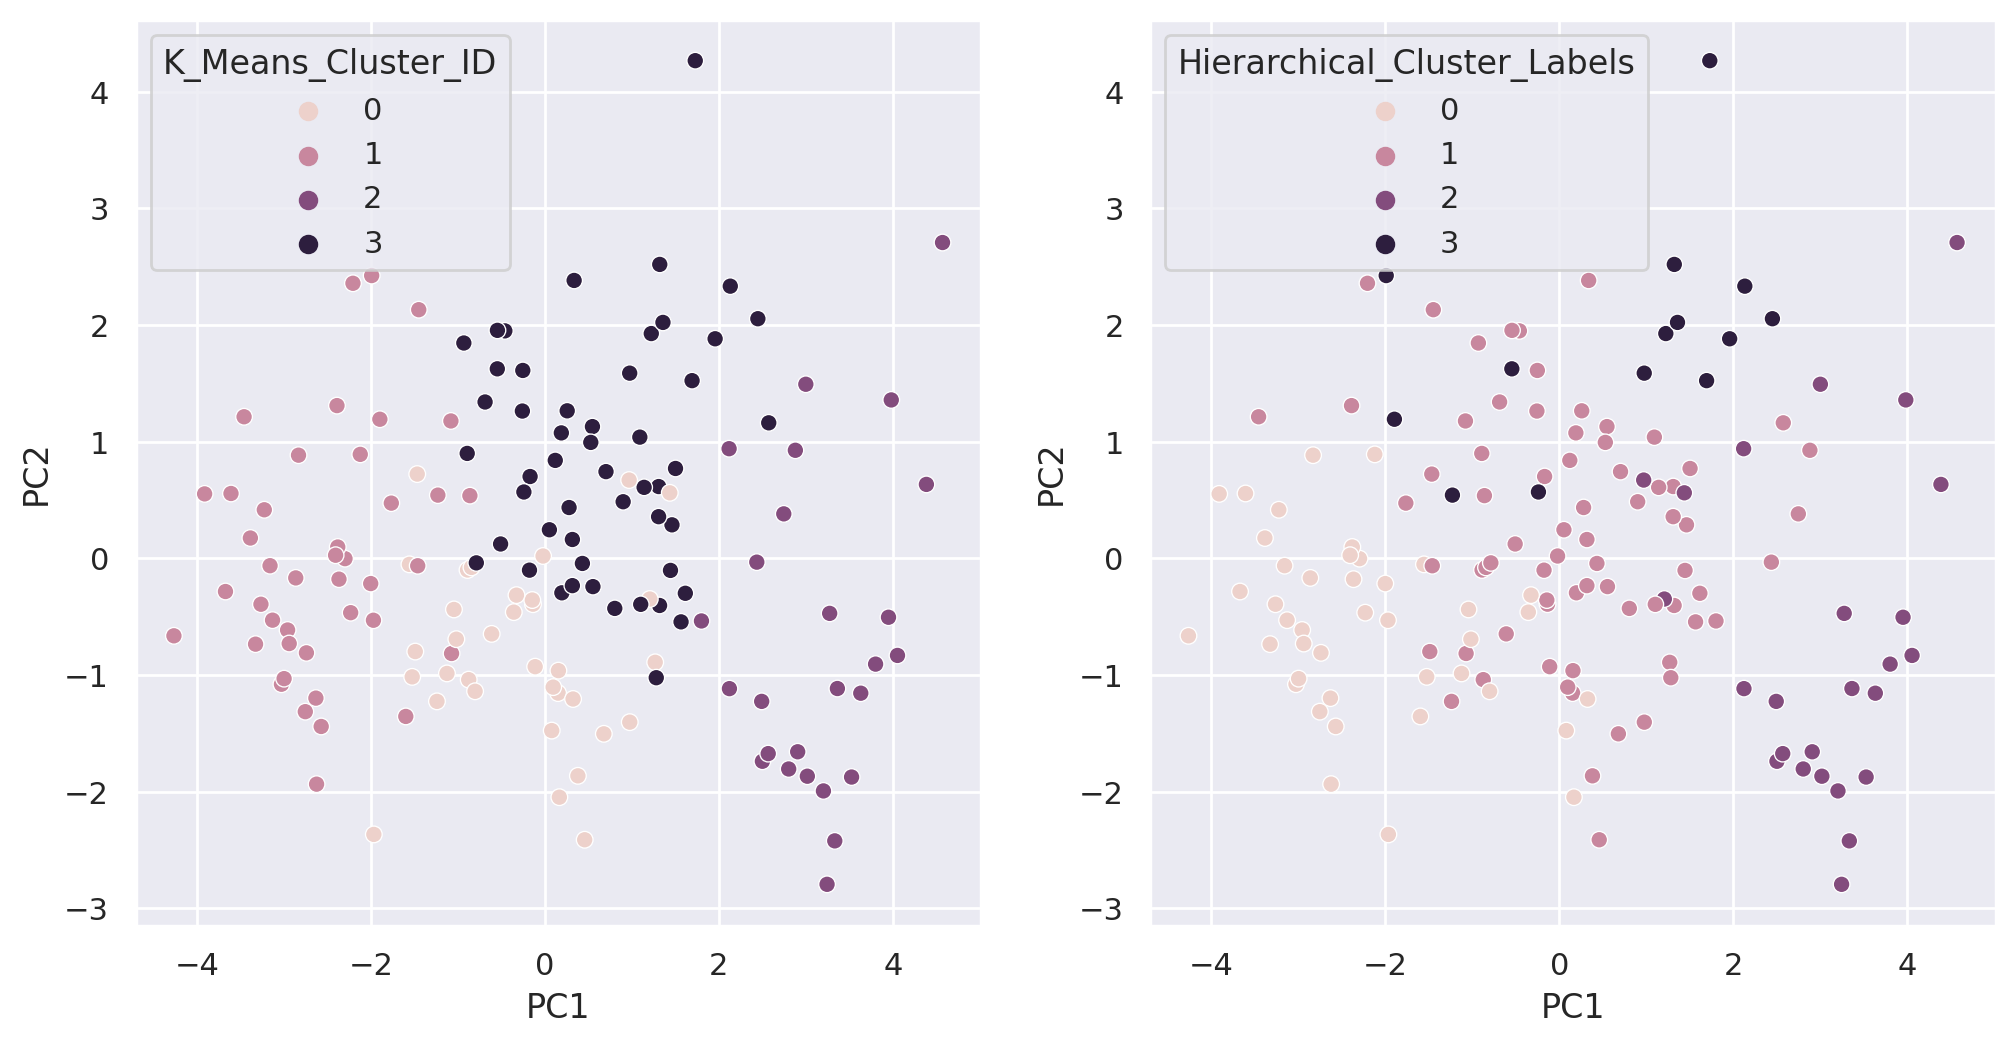

In [450]:
# gráfico de dispersão usando os dois primeiros componentes principais para observar a distribuição do cluster

plt.figure(figsize=(12,6),dpi=200)

plt.subplot(1,2,1)
sns.scatterplot(x='PC1',y='PC2',data=X_pca_final_df,hue='K_Means_Cluster_ID')

plt.subplot(1,2,2)
sns.scatterplot(x='PC1',y='PC2',data=X_pca_final_df,hue='Hierarchical_Cluster_Labels')

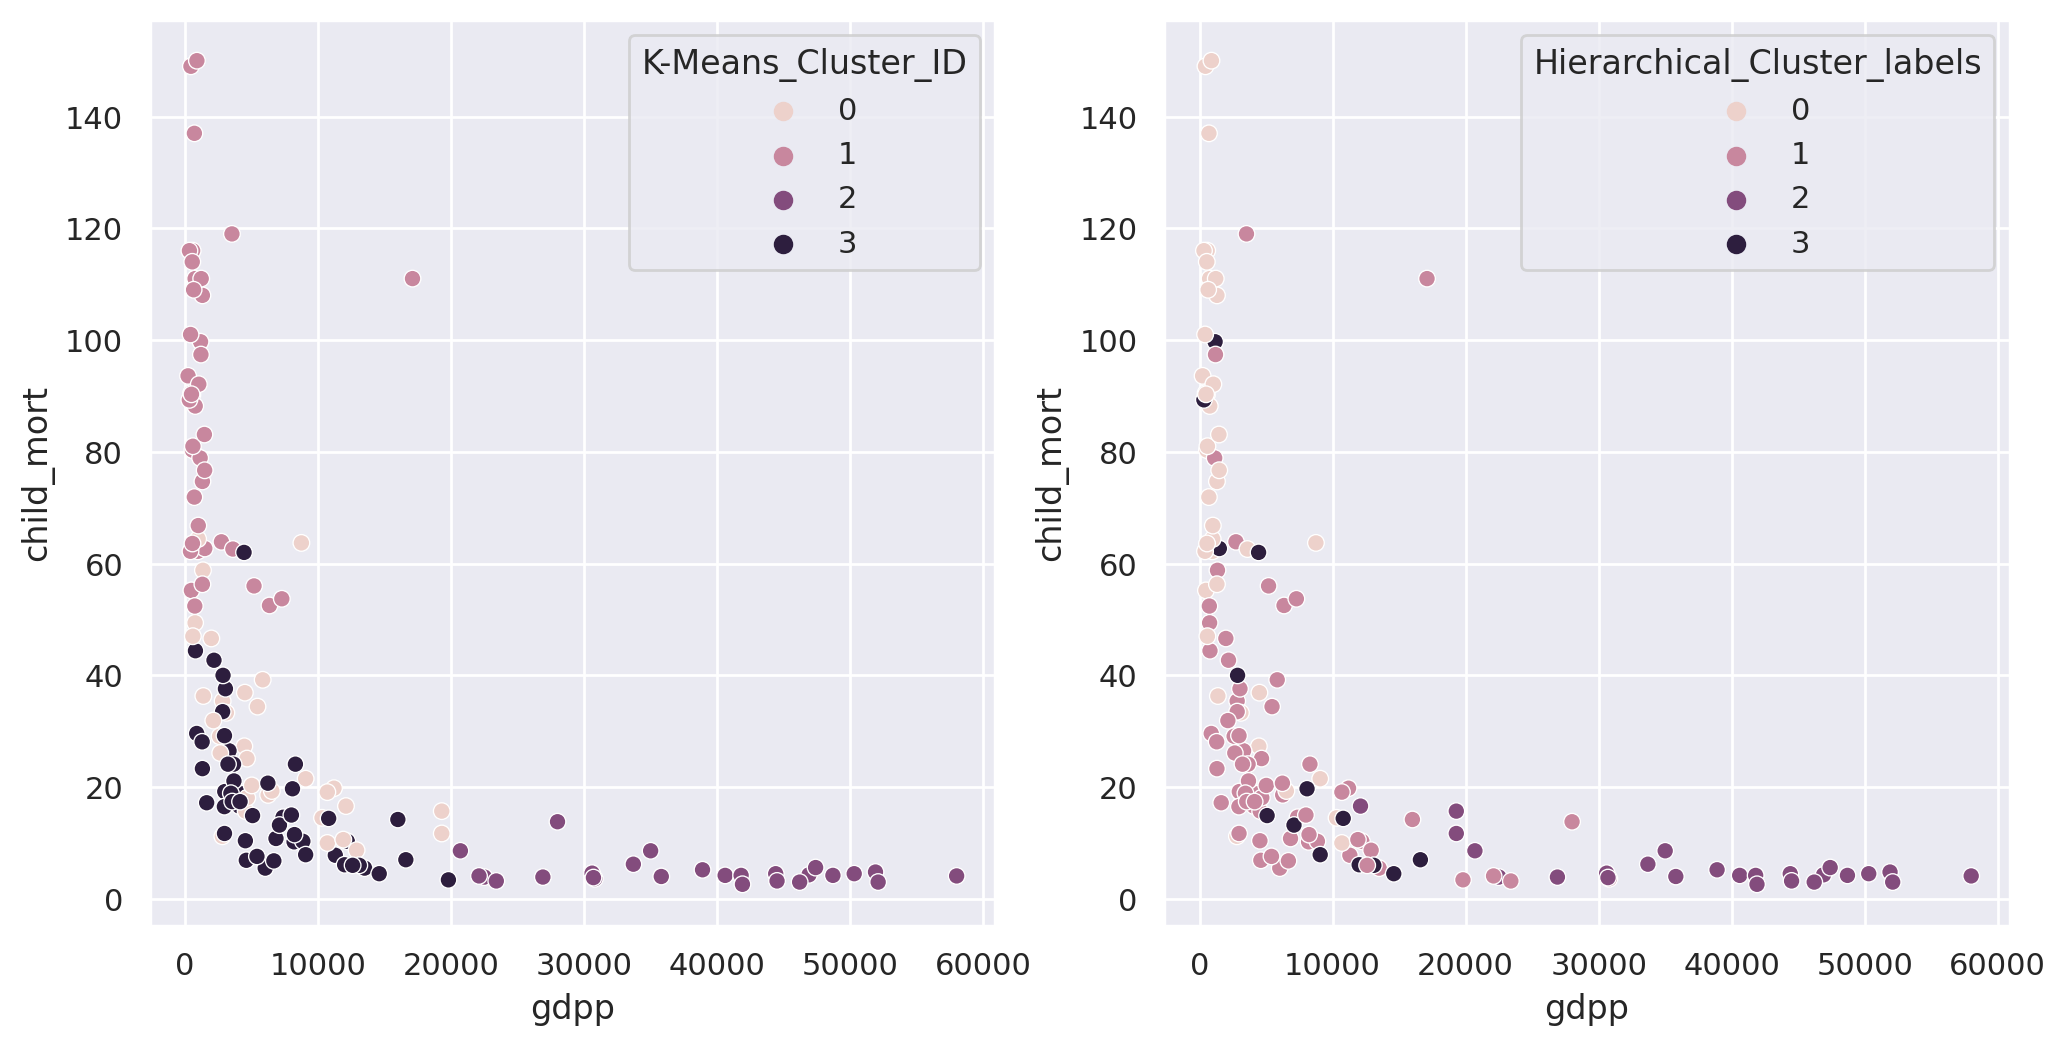

In [451]:
# gráfico de dispersão usando o PIB e Mortalidade Infantil para observar a distribuição do cluster

plt.figure(figsize=(12,6),dpi=200)

plt.subplot(1,2,1)
sns.scatterplot(x='gdpp',y='child_mort',data=df_outliers_removed,hue='K-Means_Cluster_ID')

plt.subplot(1,2,2)
sns.scatterplot(x='gdpp',y='child_mort',data=df_outliers_removed,hue='Hierarchical_Cluster_labels')


Baixo PIB corresponde a baixa renda familiar e, portanto, maior taxa de mortalidade infantil

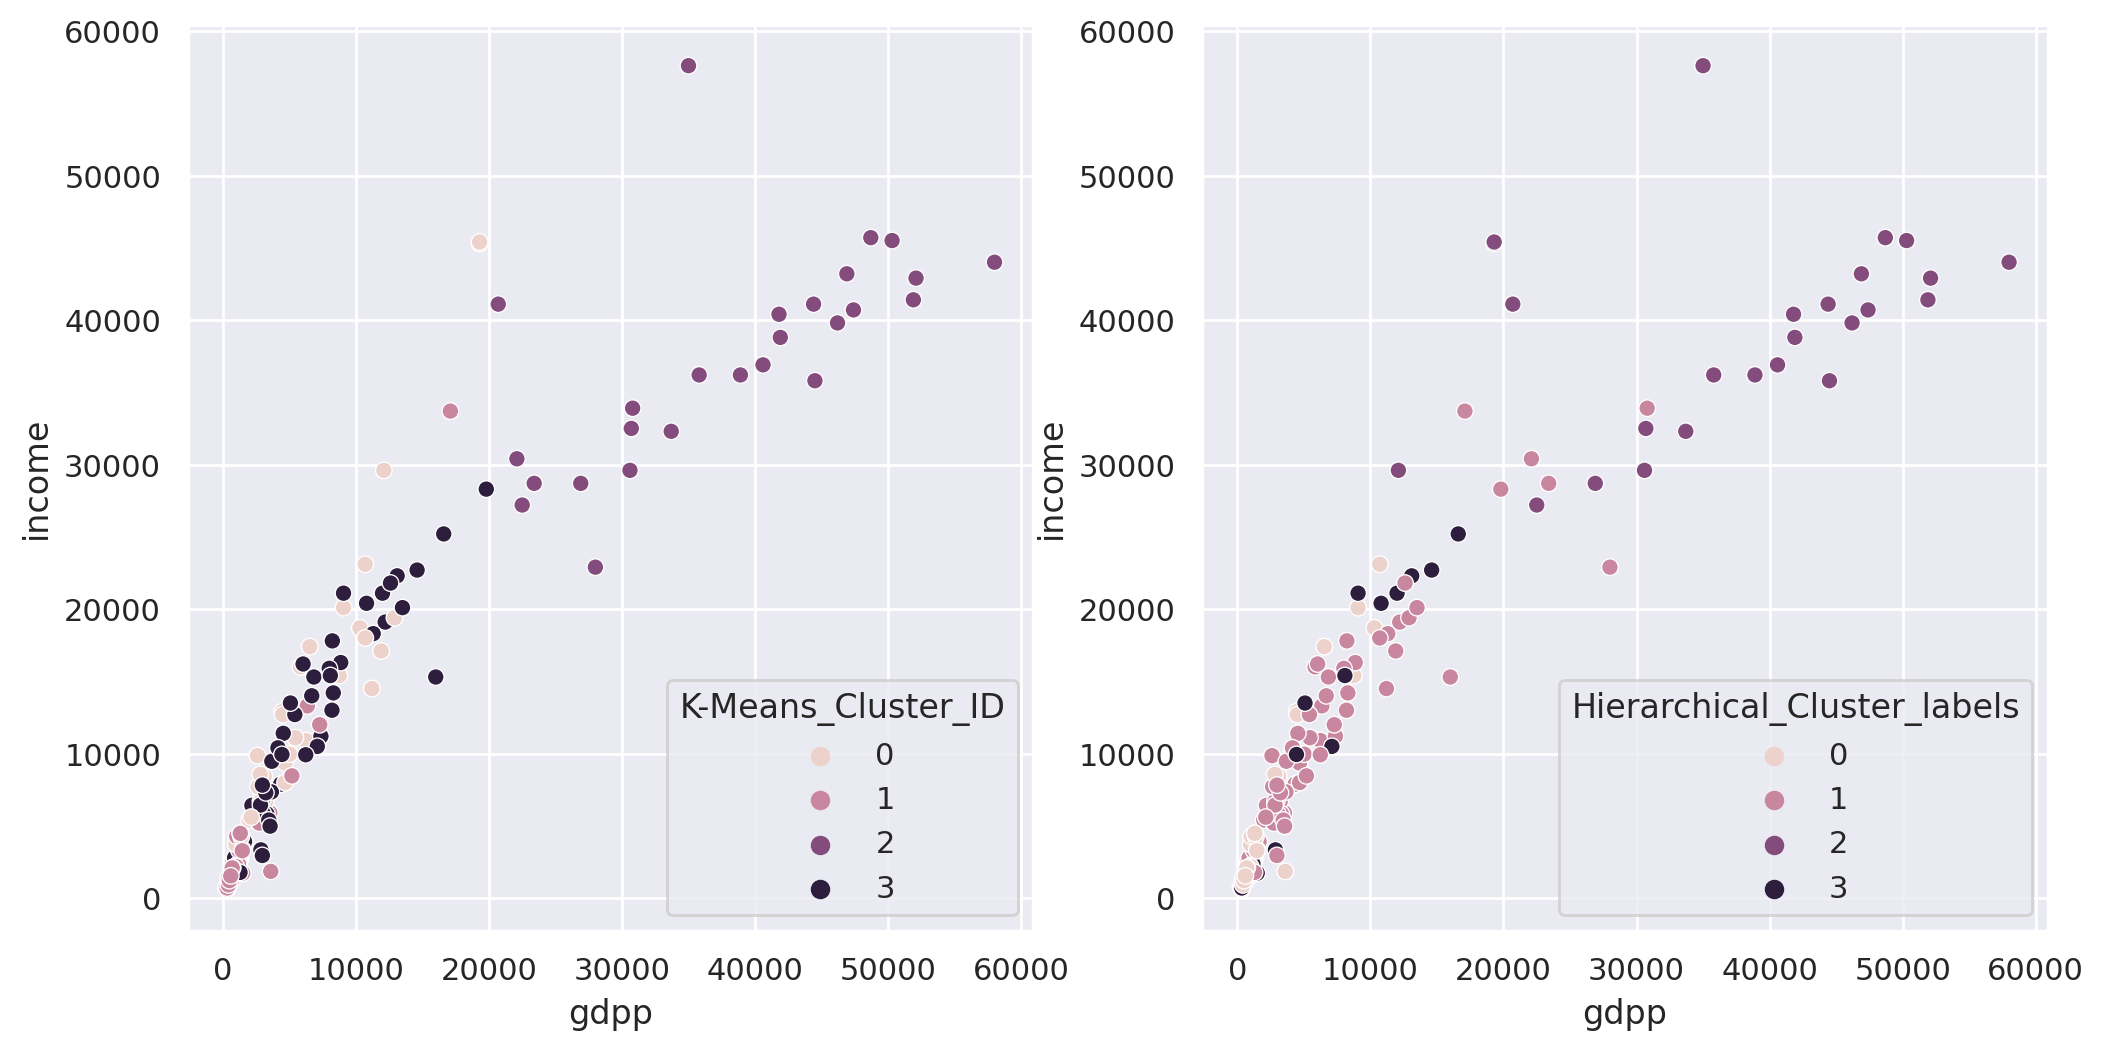

In [452]:
# gráfico de dispersão usando o PIB e renda para observar a distribuição do cluster

plt.figure(figsize=(12,6),dpi=200)

plt.subplot(1,2,1)
sns.scatterplot(x='gdpp',y='income',data=df_outliers_removed,hue='K-Means_Cluster_ID')

plt.subplot(1,2,2)
sns.scatterplot(x='gdpp',y='income',data=df_outliers_removed,hue='Hierarchical_Cluster_labels')

Podemos observar uma relação linear entre PIB e renda

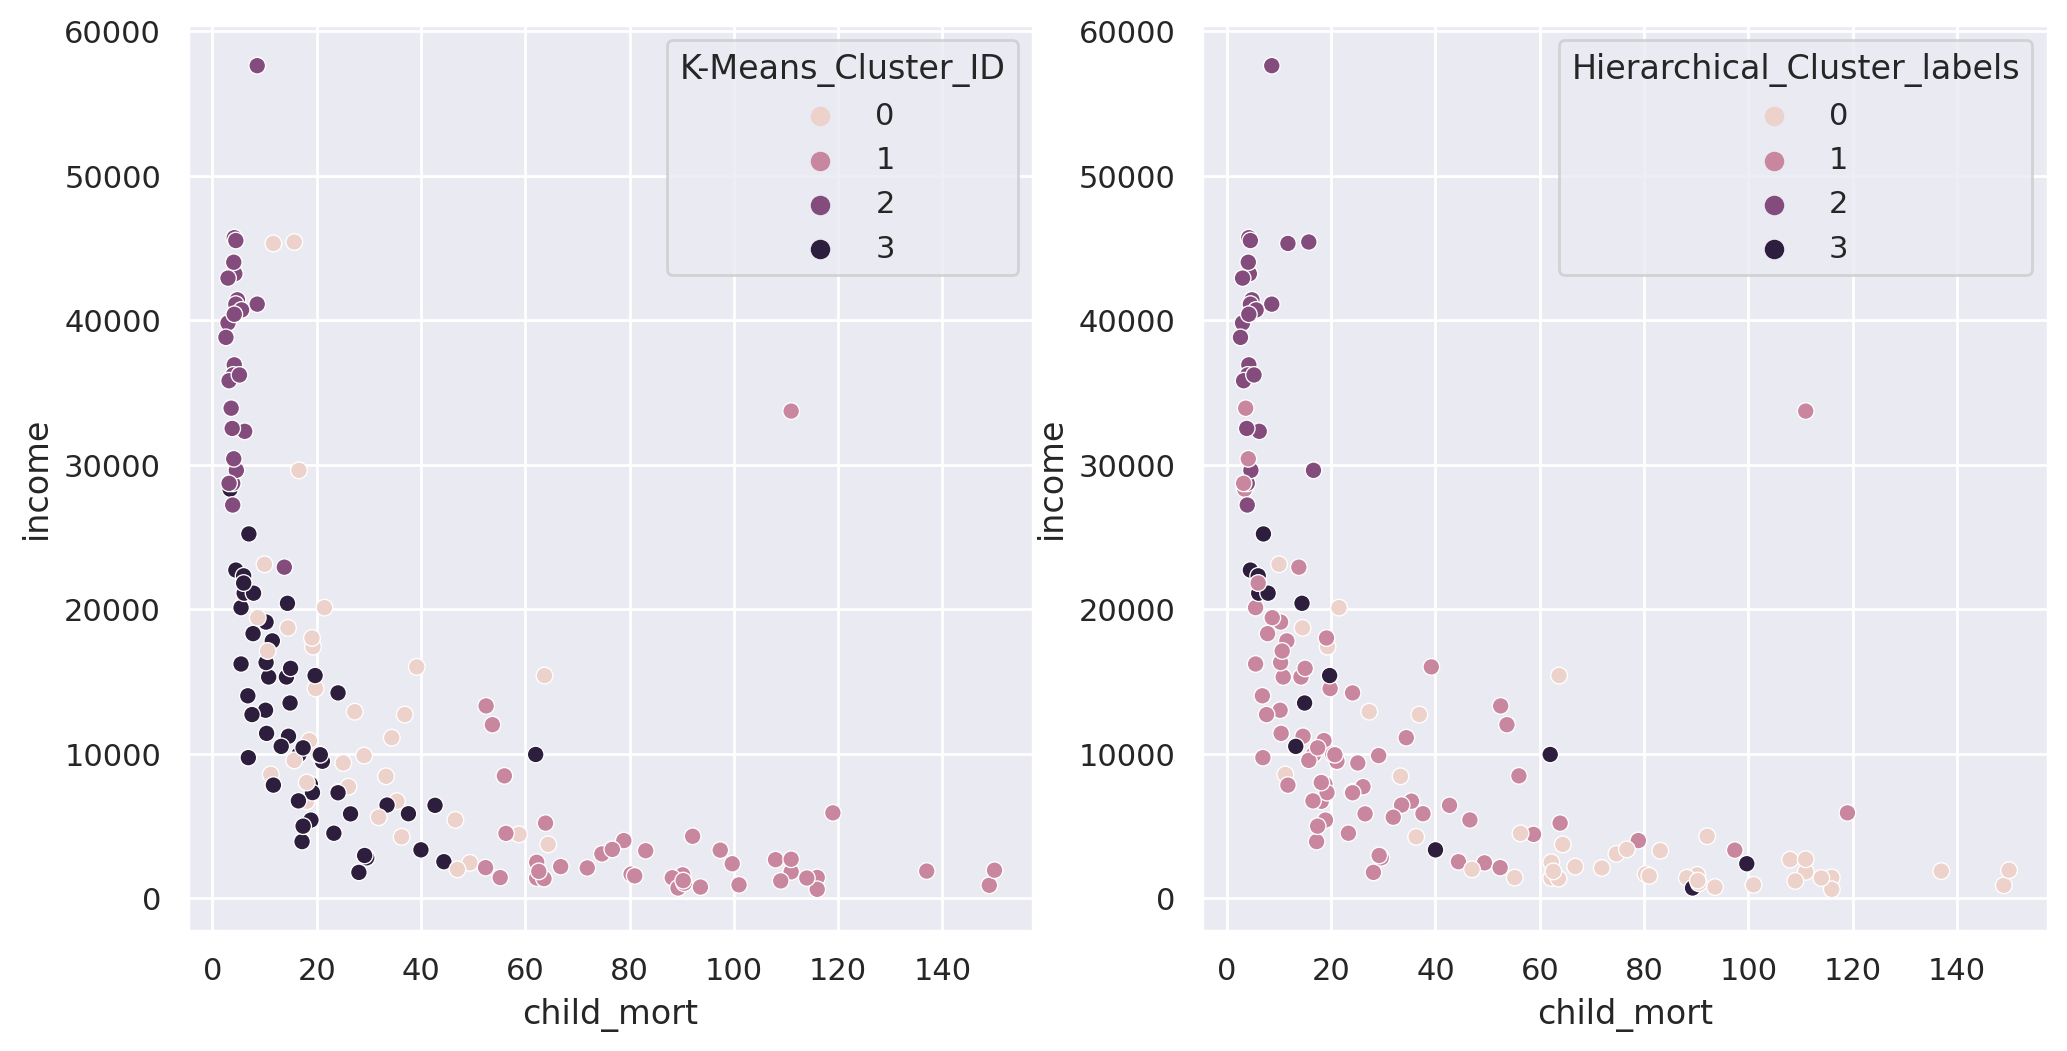

In [453]:
# gráfico de dispersão usando o Mortalidade Infantil e renda para observar a distribuição do cluster

plt.figure(figsize=(12,6),dpi=200)

plt.subplot(1,2,1)
sns.scatterplot(x='child_mort',y='income',data=df_outliers_removed,hue='K-Means_Cluster_ID')

plt.subplot(1,2,2)
sns.scatterplot(x='child_mort',y='income',data=df_outliers_removed,hue='Hierarchical_Cluster_labels')

Como podemos observar na figura acima, a baixa renda resulta em maior mortalidade infantil
